In [48]:
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

from pandas import Grouper
from pandas import Series
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from math import sqrt
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np
import warnings

import pandas as pd
import datetime
import matplotlib.pyplot as plt

Dataset 1134, Validation 300
              Close
count   1435.000000
mean    7541.815331
std     1559.589660
min     4430.000000
25%     6200.000000
50%     7350.000000
75%     8925.000000
max    10950.000000


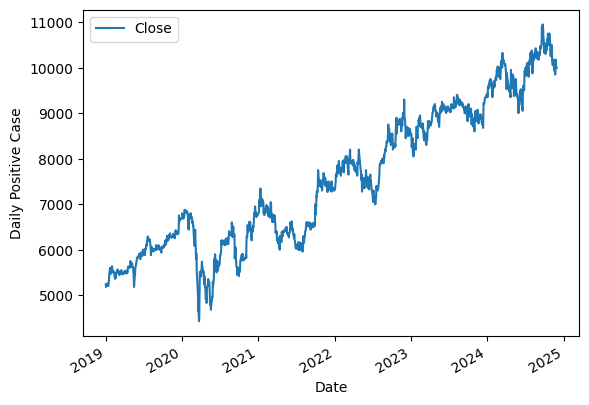

In [49]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('../../Dataset/BBCA_Close.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - (300 + end)
dataset, validation = series[0:split_point], series[split_point:-end]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                 1
count  1134.000000
mean   6966.693122
std    1189.250080
min    4430.000000
25%    6040.000000
50%    6642.500000
75%    7900.000000
max    9400.000000


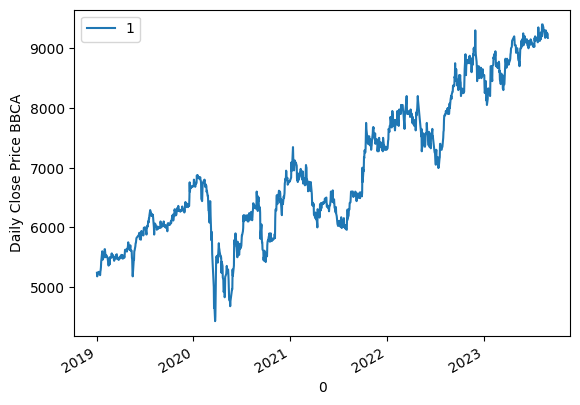

In [50]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
print(series.describe())
series.plot()
pyplot.ylabel("Daily Close Price BBCA")
pyplot.show()

                  1
count    300.000000
mean    9707.583333
std      570.251581
min     8600.000000
25%     9200.000000
50%     9750.000000
75%    10175.000000
max    10950.000000


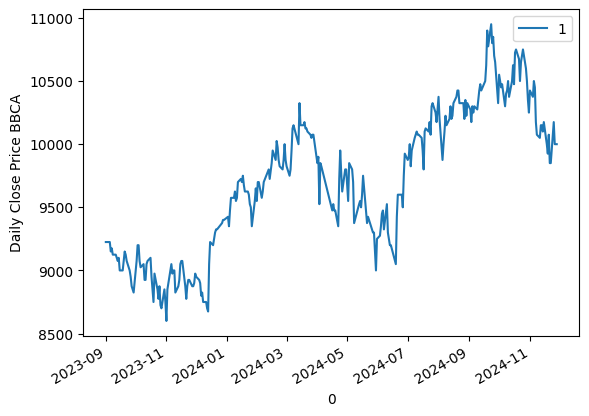

In [51]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
valid = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
print(valid.describe())
valid.plot()
pyplot.ylabel("Daily Close Price BBCA")
pyplot.show()

C:\Users\akhda\AppData\Local\Temp\ipykernel_29828\2594613765.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


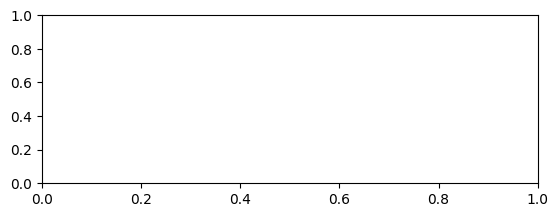

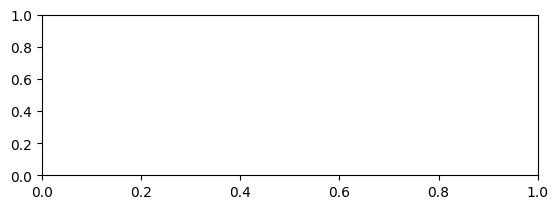

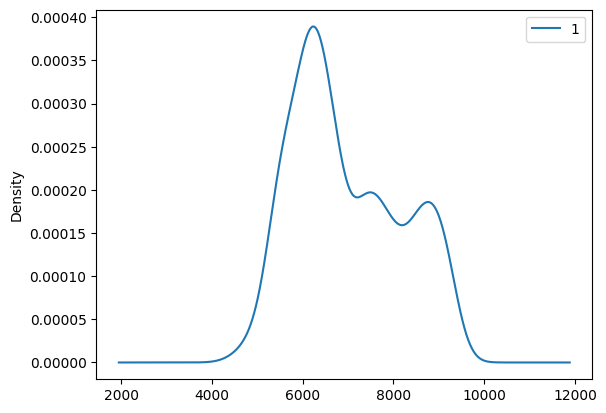

In [52]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

In [53]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    list_cfg = []
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        list_cfg.append([best_cfg,best_score])
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return list_cfg


In [54]:
# # grid search ARIMA parameters for time series
# # load dataset
# # series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# # evaluate parameters
# p_values = range(1, 5)
# d_values = [1]
# q_values = range(1, 5)
# warnings.filterwarnings("ignore")

# list_order = evaluate_models(series.values, p_values, d_values, q_values)

In [55]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 103.194


In [56]:
# tentukan model
# print(list_order)
# ARIMA_order = list_order[-1][0]
# print(ARIMA_order)
ARIMA_order = (1, 1, 1)
# print(ARIMA_order)

In [57]:
# evaluate grid search configured ARIMA model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 102.456


c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                0
count  567.000000
mean     5.179396
std    102.414978
min   -529.375000
25%    -51.471191
50%      0.117676
75%     60.157959
max    421.255859


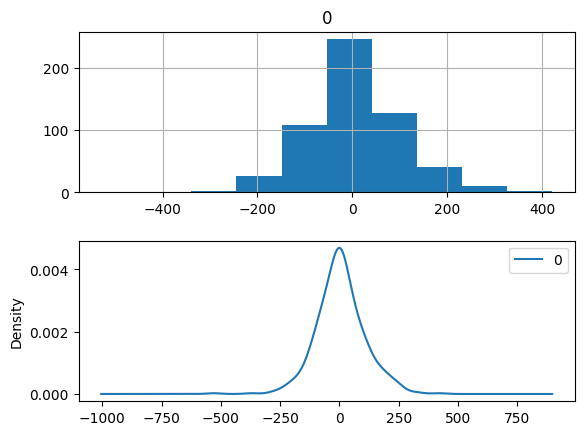

In [58]:
# summarize ARIMA forecast residuals

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [59]:
resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

5.17939567565918


c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 102.325
                0
count  567.000000
mean    -0.000010
std    102.415001
min   -534.554688
25%    -56.650635
50%     -5.062012
75%     54.978516
max    416.076660


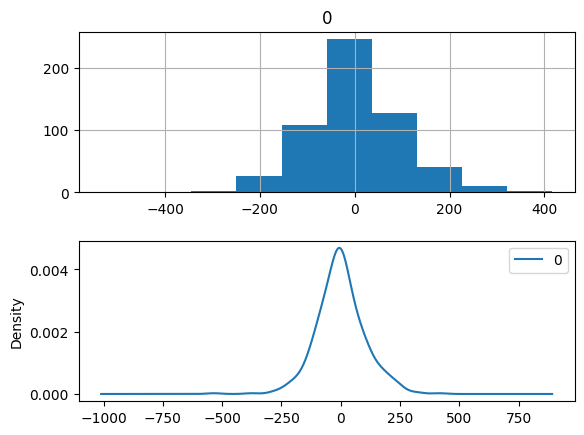

In [60]:
# plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 102.325
                0
count  567.000000
mean    -0.000010
std    102.415001
min   -534.554688
25%    -56.650635
50%     -5.062012
75%     54.978516
max    416.076660


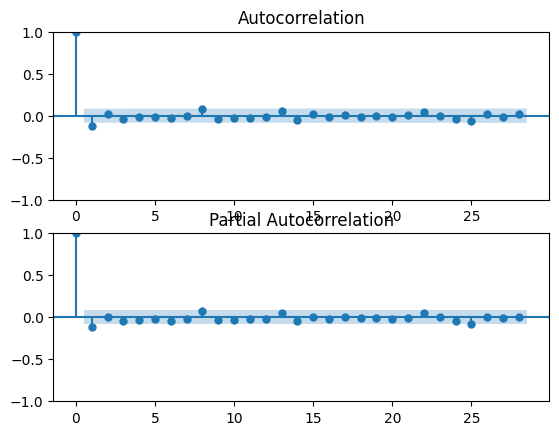

In [61]:
# ACF and PACF plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(),method='ywm')
pyplot.show()

In [62]:
# save finalized model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

# load finalized model and make a prediction

In [63]:
# load finalized model and make a prediction

# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
print('Predicted: %.3f' % yhat)

Predicted: 9182.285


# try on evaluation data

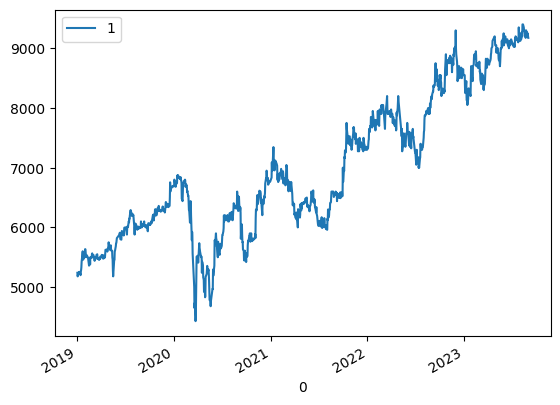

,1
0,
2019-01-02,5240.0
2019-01-03,5180.0
2019-01-04,5205.0
2019-01-07,5245.0
2019-01-08,5240.0
...,...
2023-08-25,9275.0
2023-08-28,9200.0
2023-08-29,9250.0


In [64]:
series.plot()
pyplot.show()
series

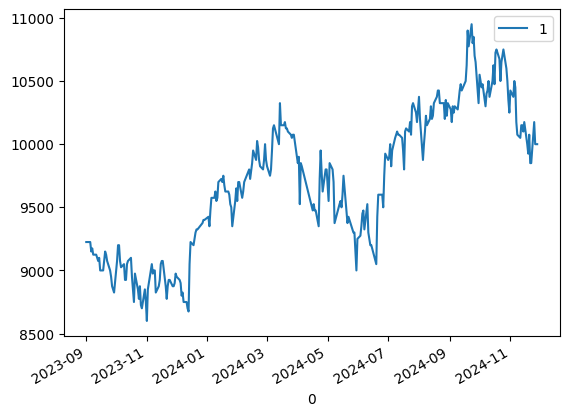

,1
0,
2023-09-01,9225.0
2023-09-04,9225.0
2023-09-05,9225.0
2023-09-06,9150.0
2023-09-07,9175.0
...,...
2024-11-21,9850.0
2024-11-22,9850.0
2024-11-25,10175.0


In [65]:
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
validation.squeeze('columns') 
validation.plot()
pyplot.show()
validation

>Predicted=9182.285, Expected=9225.000
>Predicted=9225.471, Expected=9225.000
>Predicted=9230.370, Expected=9225.000
>Predicted=9230.172, Expected=9150.000
>Predicted=9162.123, Expected=9175.000
>Predicted=9177.595, Expected=9125.000
>Predicted=9134.922, Expected=9125.000
>Predicted=9129.978, Expected=9100.000
>Predicted=9107.504, Expected=9075.000
>Predicted=9082.393, Expected=9100.000
>Predicted=9102.769, Expected=9000.000
>Predicted=9014.566, Expected=9000.000
>Predicted=9004.768, Expected=9075.000
>Predicted=9073.237, Expected=9150.000
>Predicted=9148.595, Expected=9125.000
>Predicted=9132.794, Expected=9075.000
>Predicted=9084.675, Expected=9000.000
>Predicted=9011.862, Expected=8950.000
>Predicted=8959.432, Expected=8875.000
>Predicted=8886.848, Expected=8825.000
>Predicted=8834.477, Expected=9075.000
>Predicted=9057.030, Expected=9200.000
>Predicted=9194.981, Expected=9200.000
>Predicted=9205.610, Expected=9075.000
>Predicted=9091.267, Expected=9025.000
>Predicted=9034.219, Expe

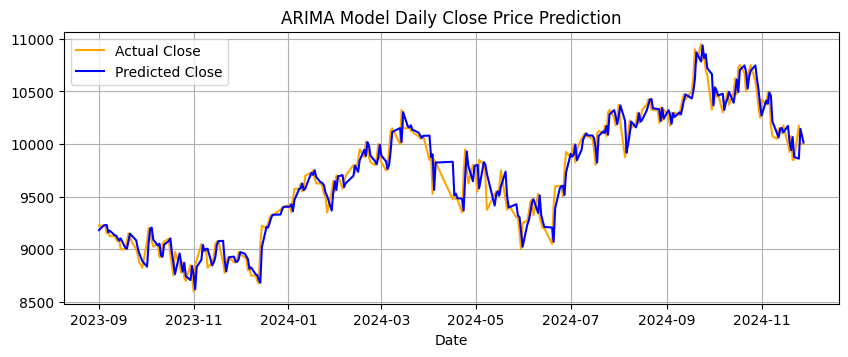

In [66]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions) *100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='orange', label='Actual Close')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='blue', label='Predicted Close')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_title('ARIMA Model Daily Close Price Prediction')
ax0.legend(['Actual Close', 'Predicted Close'])
plt.show()

In [67]:
validation

,1
0,
2023-09-01,9225.0
2023-09-04,9225.0
2023-09-05,9225.0
2023-09-06,9150.0
2023-09-07,9175.0
...,...
2024-11-21,9850.0
2024-11-22,9850.0
2024-11-25,10175.0


In [68]:
y[:,0].shape

(300,)

In [69]:
predictions_flat.shape

(300,)

>Predicted=9175.000, Expected=9225
>Predicted=9225.000, Expected=9225
>Predicted=9225.000, Expected=9225
>Predicted=9225.000, Expected=9150
>Predicted=9150.000, Expected=9175
>Predicted=9175.000, Expected=9125
>Predicted=9125.000, Expected=9125
>Predicted=9125.000, Expected=9100
>Predicted=9100.000, Expected=9075
>Predicted=9075.000, Expected=9100
>Predicted=9100.000, Expected=9000
>Predicted=9000.000, Expected=9000
>Predicted=9000.000, Expected=9075
>Predicted=9075.000, Expected=9150
>Predicted=9150.000, Expected=9125
>Predicted=9125.000, Expected=9075
>Predicted=9075.000, Expected=9000
>Predicted=9000.000, Expected=8950
>Predicted=8950.000, Expected=8875
>Predicted=8875.000, Expected=8825
>Predicted=8825.000, Expected=9075
>Predicted=9075.000, Expected=9200
>Predicted=9200.000, Expected=9200
>Predicted=9200.000, Expected=9075
>Predicted=9075.000, Expected=9025
>Predicted=9025.000, Expected=9050
>Predicted=9050.000, Expected=8925
>Predicted=8925.000, Expected=8925
>Predicted=8925.000,

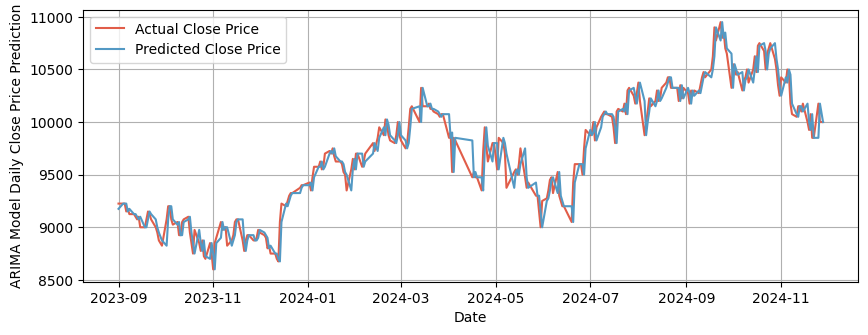

In [70]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('ARIMA Model Daily Close Price Prediction')
ax0.legend()
plt.show()

# # Assume 'y' and 'predictions' are 2D arrays with columns: Close, Volume
# predictions_array = np.array(predictions).reshape(-1, y.shape[1])

# # Create DataFrame from actual and predicted
# result = pd.DataFrame(
#     np.hstack((y, predictions_array)),
#     columns=['Actual Close', 'Predicted Close']
# )

# # Align with dates
# val_date = validation.reset_index().iloc[:, [0]].rename(columns={0: "date"})
# result_date = pd.concat([val_date, result], axis=1).set_index('date')

# # Plot
# plt.figure(figsize=(12, 6))

# # Subplot 1: Close Price
# plt.subplot(2, 1, 1)
# plt.plot(result_date.index, result_date['Actual Close'], label='Actual Close Price')
# plt.plot(result_date.index, result_date['Predicted Close'], label='Predicted Close Price')
# plt.legend()
# plt.title('Close Price Prediction')

# try on test data

                0
count  718.000000
mean     3.986589
std    113.820229
min   -529.375000
25%    -66.147095
50%      0.952393
75%     70.239258
max    372.568359


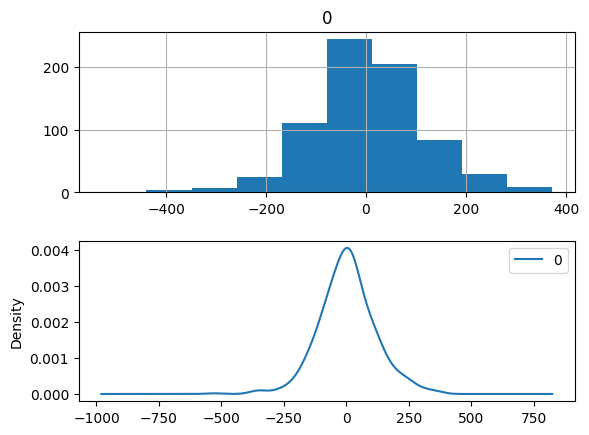

3.986589193344116


In [71]:
# find new residual on new training data

# load data
series = read_csv('../../Dataset/BBCA_Close.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

In [72]:
# save finalized model

# load data
series = read_csv('../../Dataset/BBCA_Close.csv', header=0, index_col=0, parse_dates=True)
end = 300 # sesuaikan dengan split point di awal code
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
history = [x for x in X]

# difference data
# fit model
model = ARIMA(history, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=9224.278, Expected=9225.000
>Predicted=9229.177, Expected=9225.000
>Predicted=9228.979, Expected=9150.000
>Predicted=9160.930, Expected=9175.000
>Predicted=9176.402, Expected=9125.000
>Predicted=9133.729, Expected=9125.000
>Predicted=9128.785, Expected=9100.000
>Predicted=9106.311, Expected=9075.000
>Predicted=9081.200, Expected=9100.000
>Predicted=9101.577, Expected=9000.000
>Predicted=9013.373, Expected=9000.000
>Predicted=9003.576, Expected=9075.000
>Predicted=9072.044, Expected=9150.000
>Predicted=9147.402, Expected=9125.000
>Predicted=9131.601, Expected=9075.000
>Predicted=9083.482, Expected=9000.000
>Predicted=9010.669, Expected=8950.000
>Predicted=8958.239, Expected=8875.000
>Predicted=8885.655, Expected=8825.000
>Predicted=8833.284, Expected=9075.000
>Predicted=9055.837, Expected=9200.000
>Predicted=9193.788, Expected=9200.000
>Predicted=9204.417, Expected=9075.000
>Predicted=9090.074, Expected=9025.000
>Predicted=9033.027, Expected=9050.000
>Predicted=9051.653, Expe

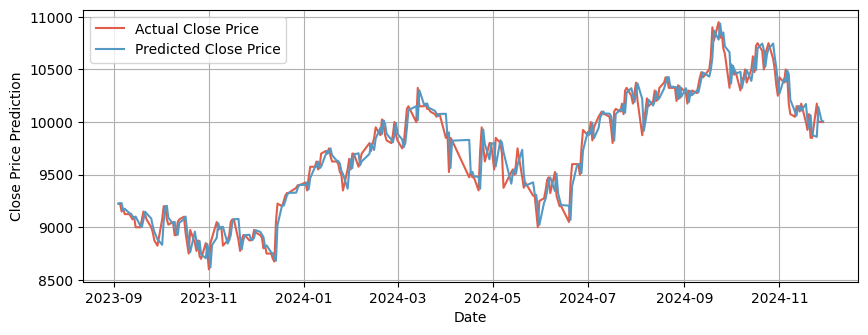

In [73]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100 
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: 'Date'})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()

>Predicted=9225.000, Expected=9225
>Predicted=9225.000, Expected=9225
>Predicted=9225.000, Expected=9150
>Predicted=9150.000, Expected=9175
>Predicted=9175.000, Expected=9125
>Predicted=9125.000, Expected=9125
>Predicted=9125.000, Expected=9100
>Predicted=9100.000, Expected=9075
>Predicted=9075.000, Expected=9100
>Predicted=9100.000, Expected=9000
>Predicted=9000.000, Expected=9000
>Predicted=9000.000, Expected=9075
>Predicted=9075.000, Expected=9150
>Predicted=9150.000, Expected=9125
>Predicted=9125.000, Expected=9075
>Predicted=9075.000, Expected=9000
>Predicted=9000.000, Expected=8950
>Predicted=8950.000, Expected=8875
>Predicted=8875.000, Expected=8825
>Predicted=8825.000, Expected=9075
>Predicted=9075.000, Expected=9200
>Predicted=9200.000, Expected=9200
>Predicted=9200.000, Expected=9075
>Predicted=9075.000, Expected=9025
>Predicted=9025.000, Expected=9050
>Predicted=9050.000, Expected=8925
>Predicted=8925.000, Expected=8925
>Predicted=8925.000, Expected=9050
>Predicted=9050.000,

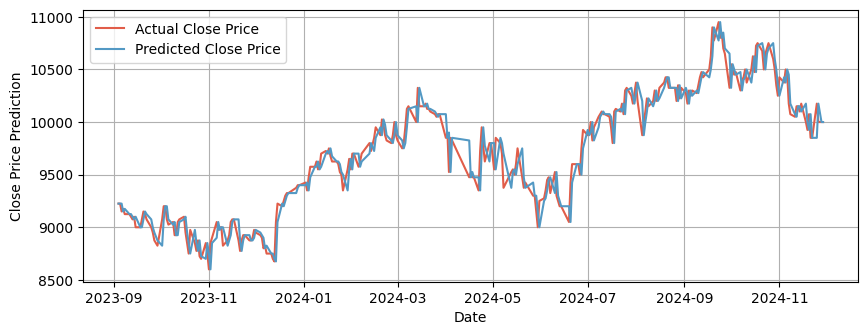

In [74]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "Date"})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()